<a href="https://colab.research.google.com/github/Gabeduffy/ADS500B/blob/main/ADS_500B_Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysing House Sales for a County in Washington State.**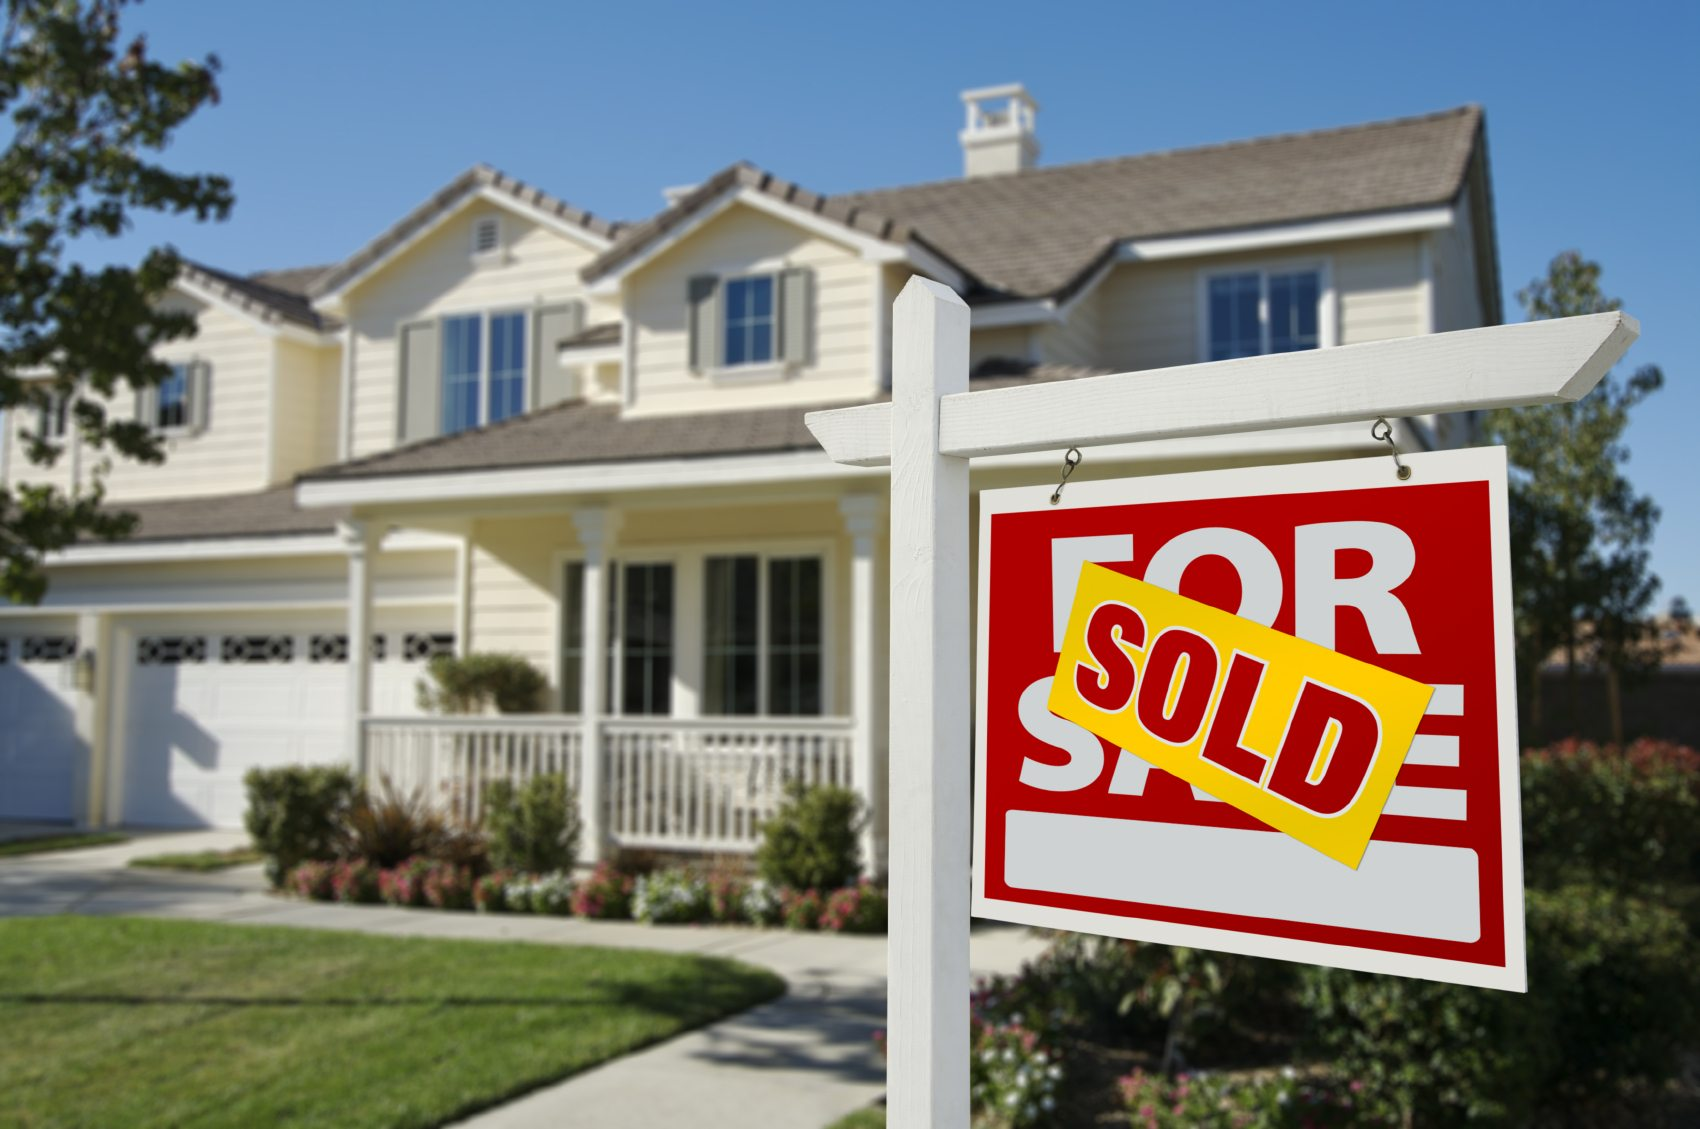

**Research Question Pre Exploration ** This study utilizes the house sales dataset sourced from ADS-500B to investigate the factors influencing house sales and understand the distribution of house prices. In this analysis, we aim to identify the key determinants impacting the real estate market. Through exploratory data analysis (EDA) techniques, we will see the distribution of house prices, also better understanding of the factors driving housing sales and informs potential stakeholders, including homeowners, real estate agents, and policymakers, for making informed decisions in the housing sector.

**Team Project Research Question:** What effect will the zipcode of the house have on it's price? The key variable for understanding the distribution of house prices are price column (which provides the sale prices of the houses) and zipcode column (identifies the zip codes of the houses, allowing you to group the data by zip code and analyze the distribution of house prices within each area).

**Team Project Hypothesis:** We believe that the zipcode will have a signicant effect on the house price. We believe their will be a high distribution in house prices based on the zip code where the house is located

# **Topic #1 Data Importing and Pre-processing**

**Task # 1 Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used**

In [ ]:
#imports the needed libraries into the current work environment
import numpy as np  # supporting for arrays, matrices, and mathematical functions
import pandas as pd  # data structures like DataFrame for working with structured data
import matplotlib as mpl  # animated visualizations
import matplotlib.pyplot as plt  # a MATLAB-like plotting framework
import seaborn as sns  # high-level interface for drawing attractive and informative statistical graphics
from scipy.stats import linregress  # linear regression and related statistics
from scipy.stats import f_oneway  # one-way ANOVA (Analysis of Variance) test
from sklearn.cluster import KMeans  # KMeans algorithm for clustering data

In [ ]:
# Let's upload the house_sales.csv data set
from google.colab import files
house_sales = files.upload()

# imports the working file into a dataframe and names it "house_sales" and print first five observations
house_sales = pd.read_csv("house_sales.csv")
house_sales.head()


Saving house_sales.csv to house_sales.csv


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6414100192  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5631500400  20150225T000000  180000.0       2.0       1.00        770.0   
3  2487200875  20141209T000000  604000.0       4.0       3.00       1960.0   
4  1954400510  20150218T000000  510000.0       3.0       2.00       1680.0   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0    5650.0     1.0           0     0  ...      7        1180              0   
1    7242.0     2.0           0     0  ...      7        2170            400   
2   10000.0     1.0           0     0  ...      6         770              0   
3    5000.0     1.0           0     0  ...      7        1050            910   
4    8080.0     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

**How to describe characteristics**

In [ ]:

# imports the working file into a dataframe and names it "house_df"
house_df = pd.read_csv("house_sales.csv")

# info() method describes the characteristics of the dataframe such as dimensions, datatype, and import methods used.
house_df.info()

# provide a descriptive statistics of the "house_sales.csv" dataframe
house_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  20479.000000  20545.000000  20503.000000   
mean   4.580302e+09  5.400881e+05      3.372821      2.113507   2081.073697   
std    2.876566e+09  3.671272e+05      0.930711      0.768913    915.043176   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.500000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  12050.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.056900e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.517982e+04      1.494309      0.007542      0.234303      3.409430   
std    4.148617e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.620000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.070800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

File type is Comma Seperated Values(CSV)
Import method used is Google Colab to pull dataset from directory

Task # 2 **Clean, wrangle, and handle missing data**

In [ ]:
#TO DO:  #adjSalePrice     # group by zip code

# displaying missing value quantities
house_df.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [ ]:
#Imputing missing values with the mode (most frequent value) of the categorical columns
col_missing_toMode = ['waterfront', 'view', 'condition', 'grade']
for col in col_missing_toMode:
    house_df[col] = house_df[col].fillna(house_df[col].mode()[0])

# # Imputing missing values for numerical columns with mean
col_missing_toMean = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
for col in col_missing_toMean:
    house_df[col] = house_df[col].fillna(house_df[col].mean())

# Verifing that there are no more missing values in the columns
print(house_df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


**Imputing with Mode or Mean:**

For categorical columns like waterfront, view, condition, and grade, imputing missing values with the mode (most frequent value) of each respective column.

For numerical columns like bedrooms, bathrooms, sqft_living, and sqft_lot imputing the missing values with the mean of each respective column.

**Dropping Missing Values:**

If the proportion of missing values is very small and randomly distributed, then dropping those rows entirely is better choice. However, if dropping missing values would result in a significant loss of data, especially in columns critical for analysis, imputation might be a better choice.

## DISCOVER OUTLIERS TO REDUCE
USE BOXPLOT VISUAL

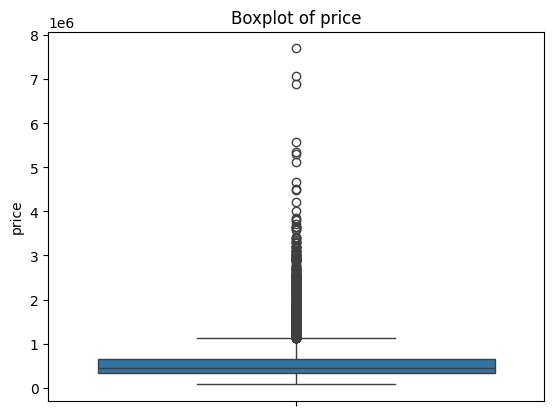

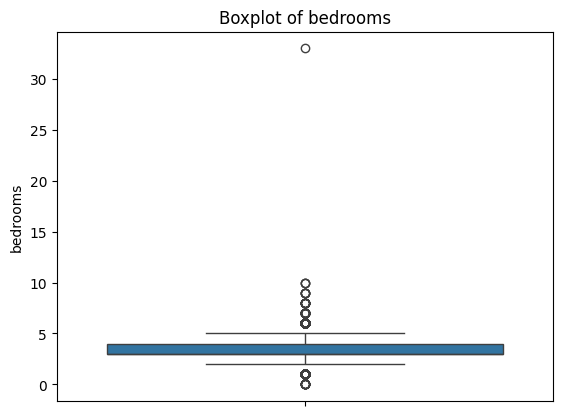

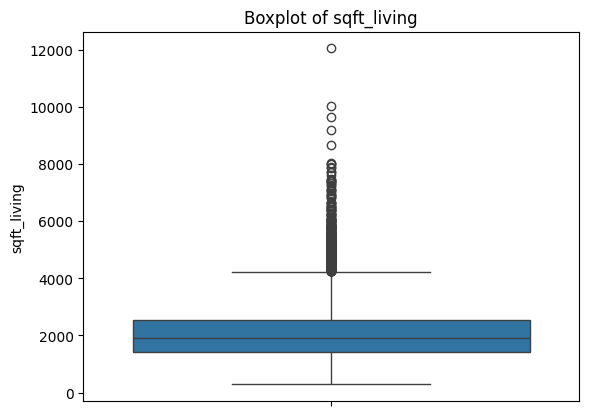

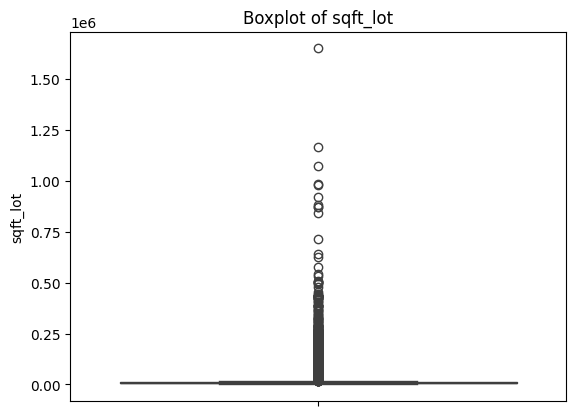

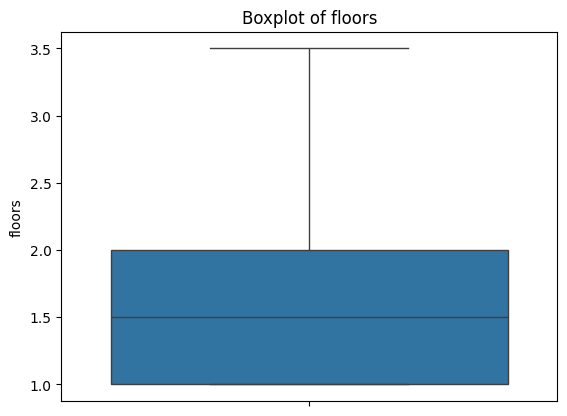

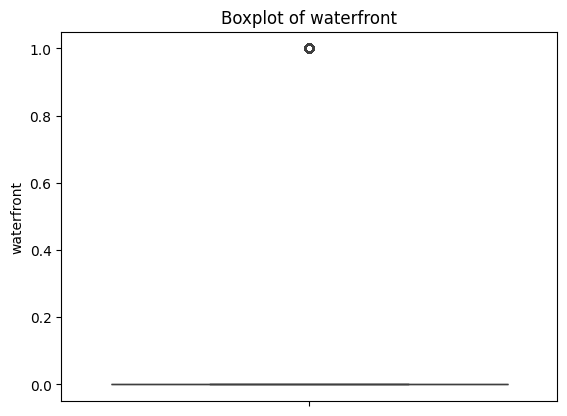

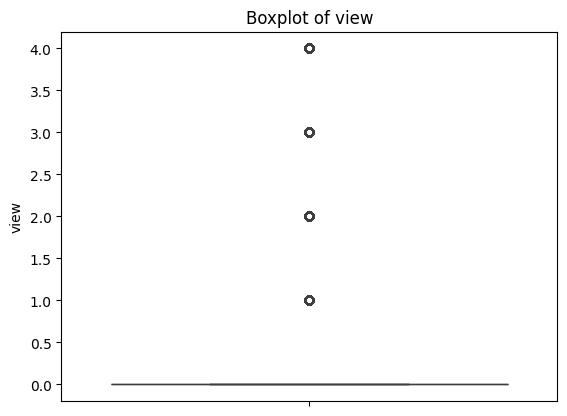

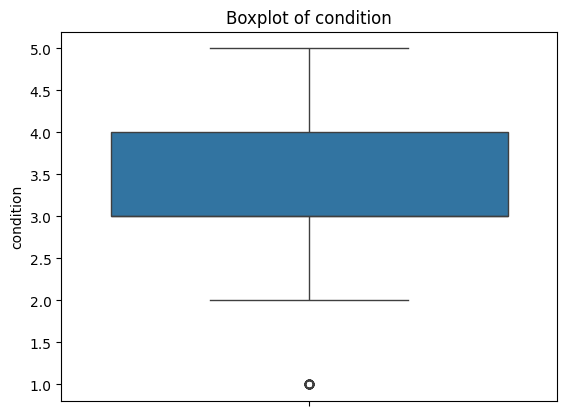

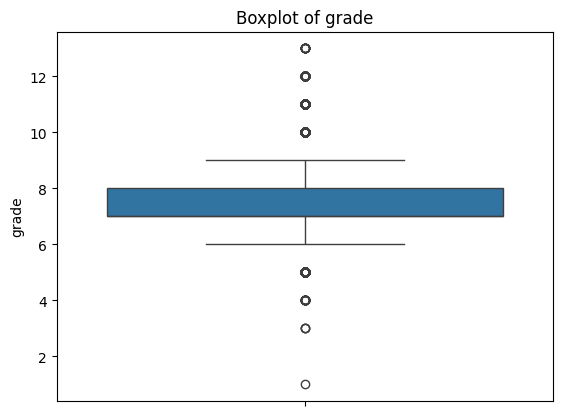

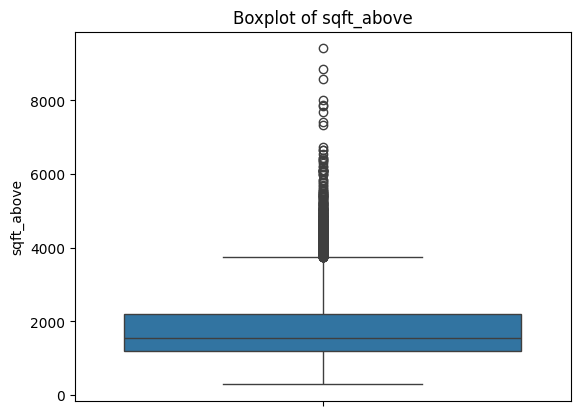

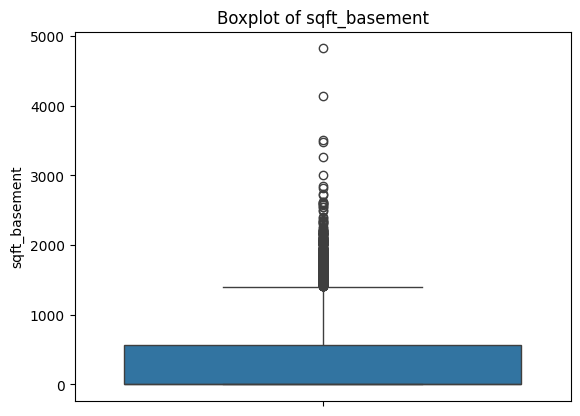

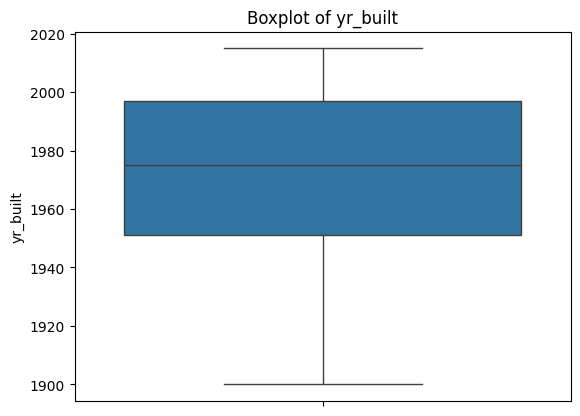

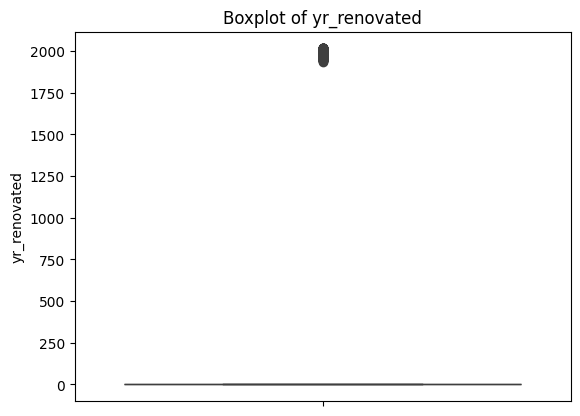

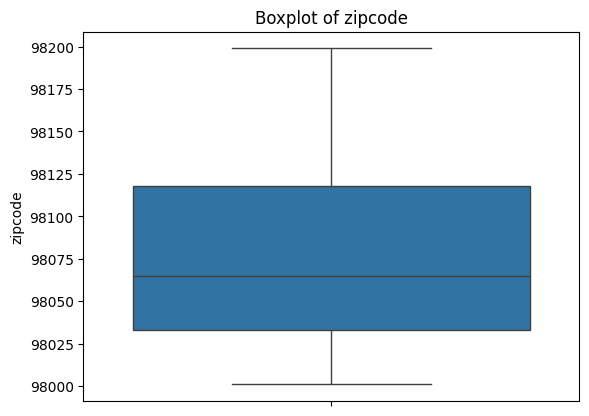

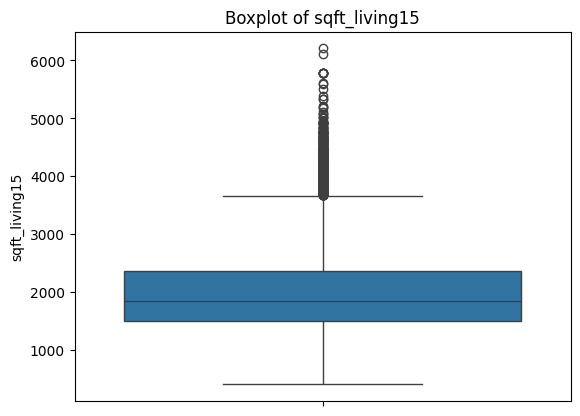

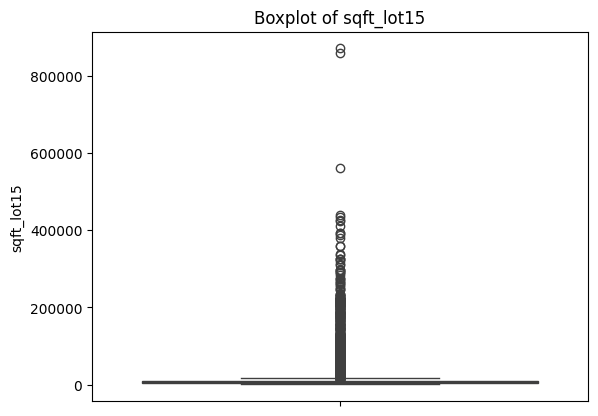

In [ ]:
# boxplot to find outliers
features_to_boxplot = ['price', 'bedrooms', 'sqft_living', 'sqft_lot',
                       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
                       'sqft_lot15']

for col in features_to_boxplot:
    plt.figure(col)
    sns.boxplot(house_df[col])
    plt.title(f'Boxplot of {col}')  # sets the title of the plot
    plt.show()  # displays the plot

33 Bedroom should be eliminated. other data indicates a typo - not typical of home in 98103 and price 64000 does not reflect the value.

Task #3 **Transform data appropriately using techniques such as aggregation, normalization, and feature construction**


## Normalization
Normalization is used to explore potential outliers to exclude or correct, for that I use boxplots of each variable to check for outliers to correct.
(pg 243)


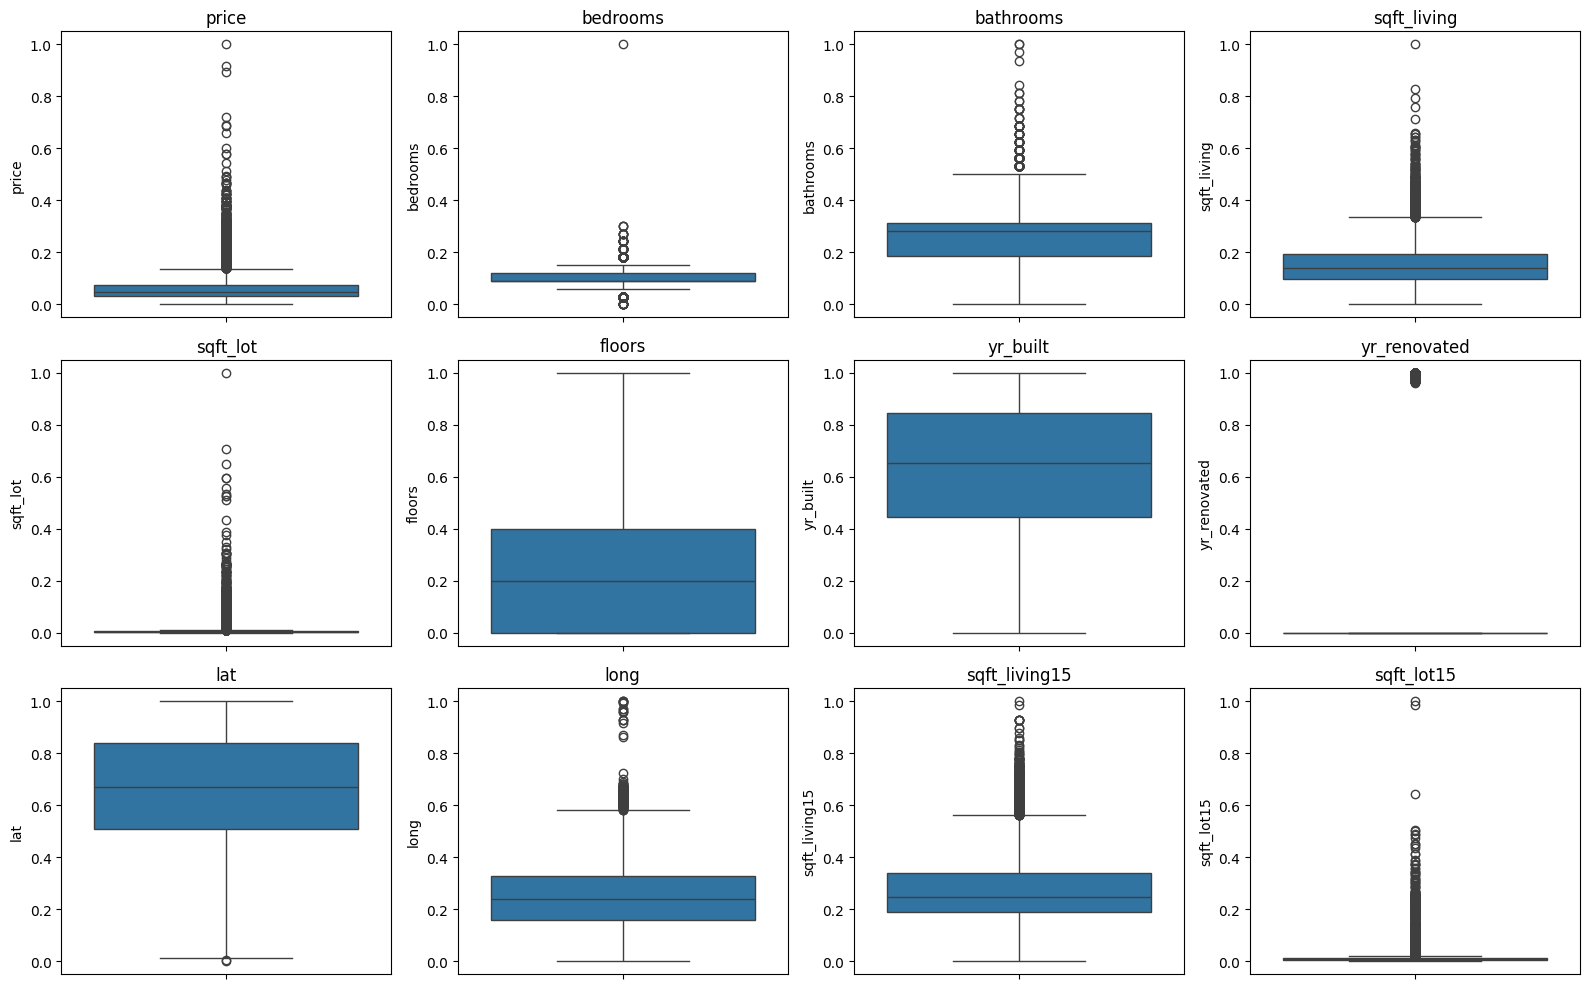

In [ ]:
#Let's normalize the numerical variables to ensure that they are on a similar scale, than will use boxplots to visually inspect each variable for potential outliers.
# Import MinMaxScaler for normalization
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                  'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Perform normalization
scaler = MinMaxScaler()

 # Make a copy of the original dataframe to avoid modifying the original data
house_sales_normalized = house_sales.copy()

#  scaling the numerical columns to a range between 0 and 1.
house_sales_normalized[numerical_cols] = scaler.fit_transform(house_sales_normalized[numerical_cols])

# Check for outliers using boxplots for each numerical variable
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=house_sales_normalized[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Task #4 **Reduce redundant data and perform need based discretization**

**Variance Inflation explanation of why removing redundant columns**

In [ ]:
# identifying redundant or irrelevent columns
columns_to_drop = ['id', 'date', 'floors', 'sqft_above','sqft_basement','yr_built','lat','long', 'yr_renovated','sqft_living15','sqft_lot15']

# remove identified columns from the Dataframe
house_sales_cleaned = house_sales.drop(columns=columns_to_drop)

#priniting cleaned data to make sure columns were dropped
print(house_sales_cleaned.head())


      price  bedrooms  bathrooms  sqft_living  sqft_lot  waterfront  view  \
0  221900.0       3.0       1.00       1180.0    5650.0           0     0   
1  538000.0       3.0       2.25       2570.0    7242.0           0     0   
2  180000.0       2.0       1.00        770.0   10000.0           0     0   
3  604000.0       4.0       3.00       1960.0    5000.0           0     0   
4  510000.0       3.0       2.00       1680.0    8080.0           0     0   

   condition  grade  zipcode  
0          3      7    98178  
1          3      7    98125  
2          3      6    98028  
3          5      7    98136  
4          3      8    98074  


# **Topic # 1 Data Importing and Pre-processing Round 2**

Task #3 **Transform data**

Standardization of some numerical fields in order to improve kmeans output.

In [ ]:
from scipy.stats import zscore

# List of columns to standardize
columns_to_standardize = ['price', 'sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated']

# Apply z-score standardization
for column in columns_to_standardize:
    house_sales[column + '_zscore'] = zscore(house_sales[column])

# Print the first few rows of the DataFrame to verify the new columns
print(house_sales.head())

# **Topic #2 Data Analysis and Visualization**
*   Identify categorical, ordinal, and numerical variables within the data
*   Provide measures of centrality and distribution with visualizations

*   Diagnose for correlations between variables and determine independent and dependent variables
*   Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

# **Identifying Variables **





*   **ordinal:** There are no ordinal variables listed in the dataset.
*  **categorical:** waterfront, view, condition, grade,
*  **numerica:** bold text bold textbedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15


Since the missing values have been handled, we can proceed with visualizing the distribution of house prices across different zip codes.

Let's generate histograms, box plots, and scatter plots for each numerical variable in house_sales dataset, along with summary statistics like mean, median, and quartiles.

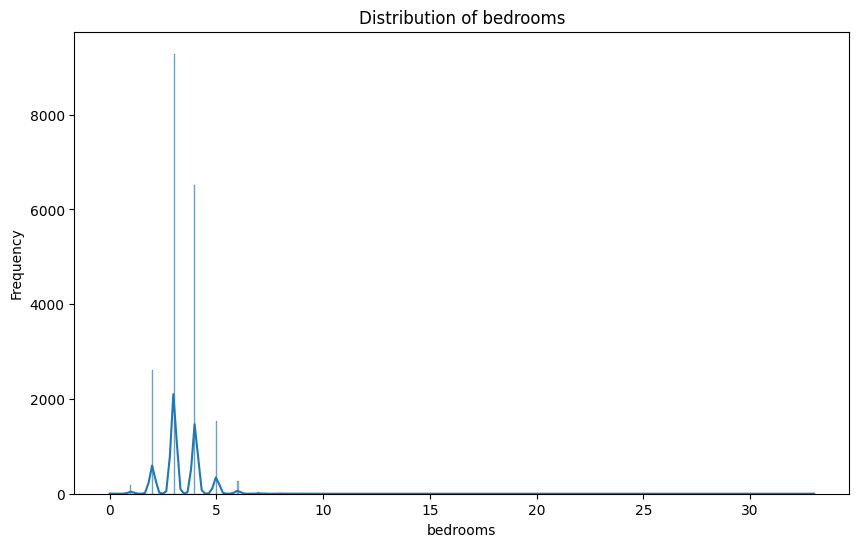

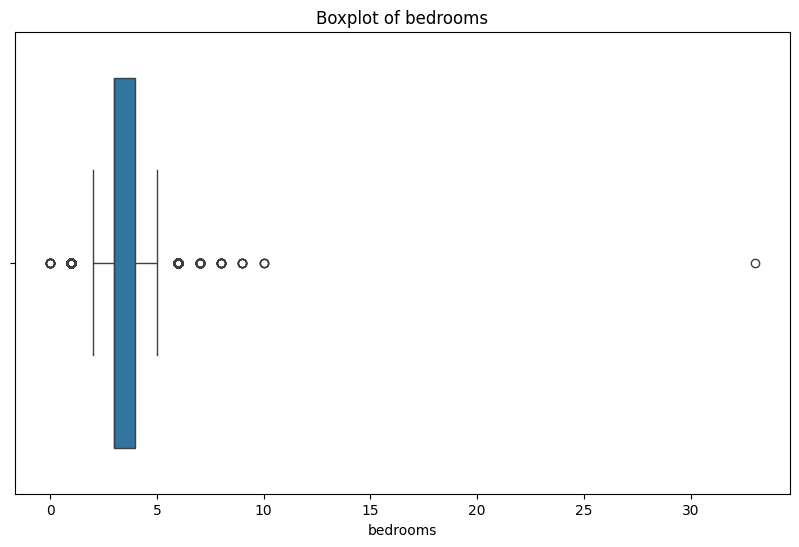

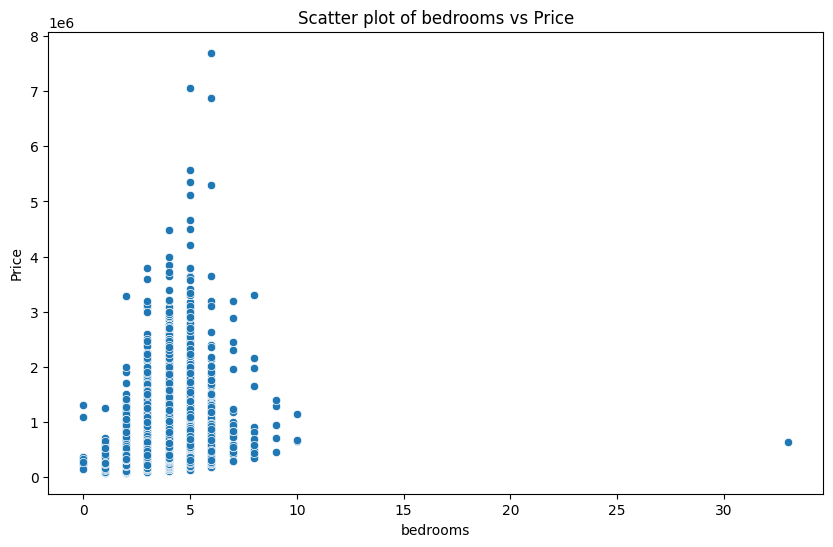

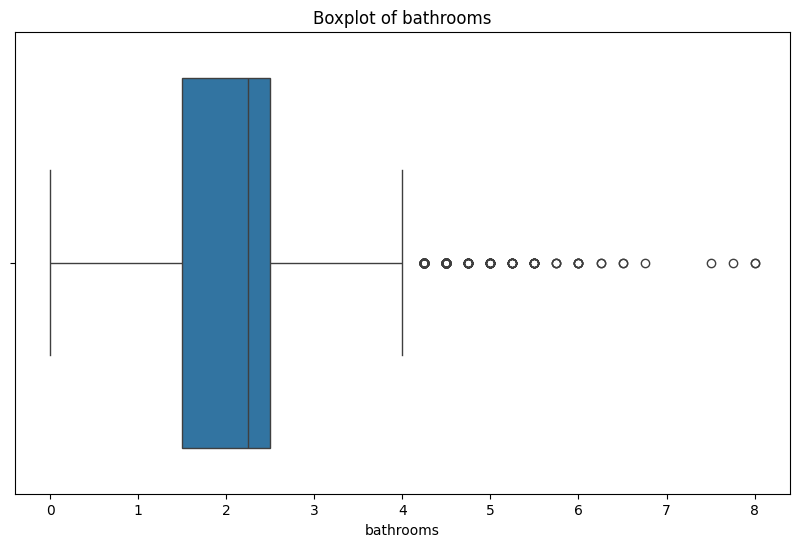

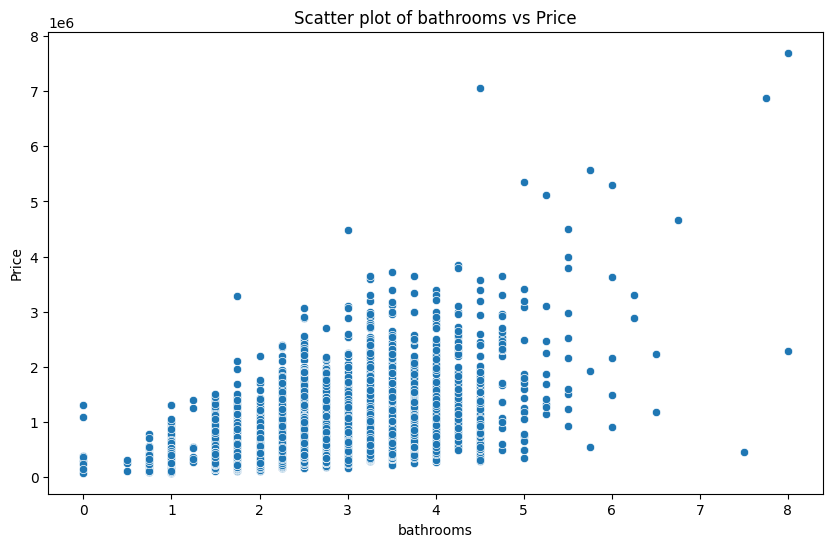

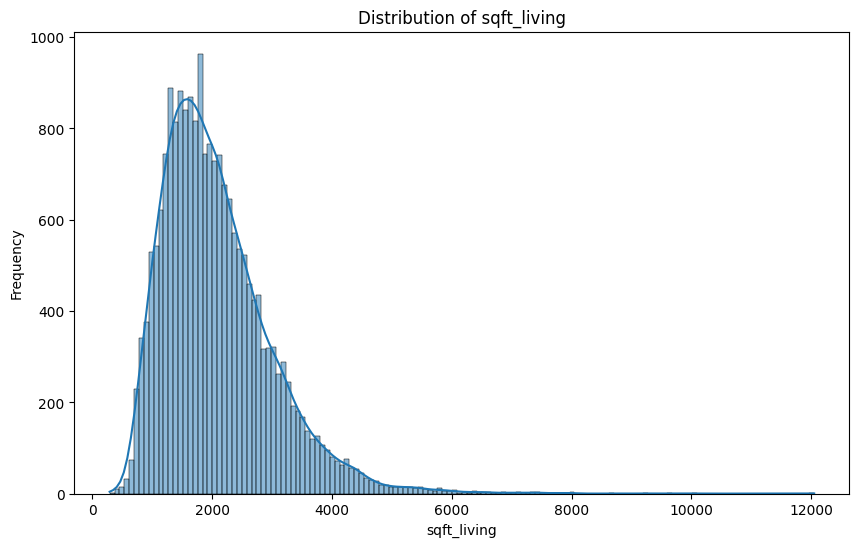

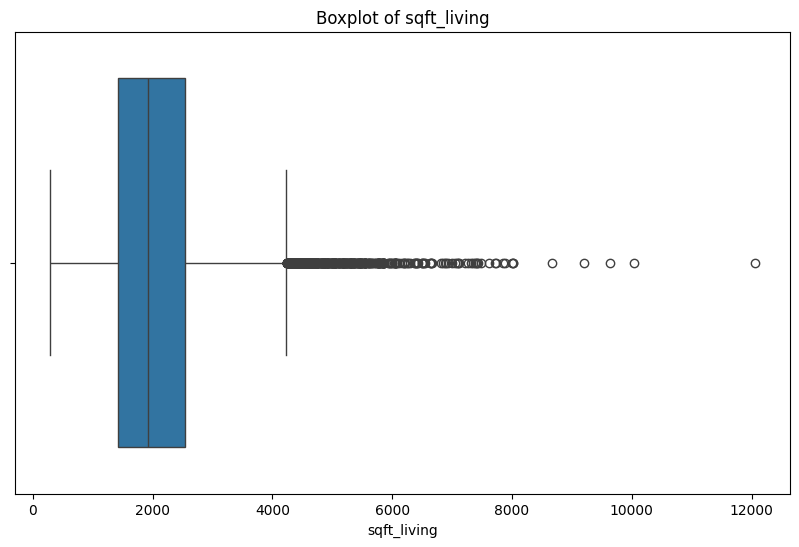

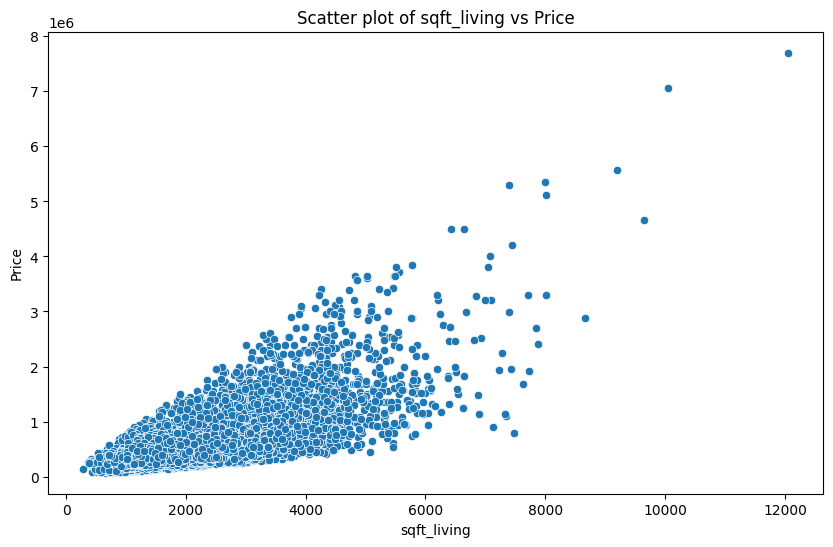

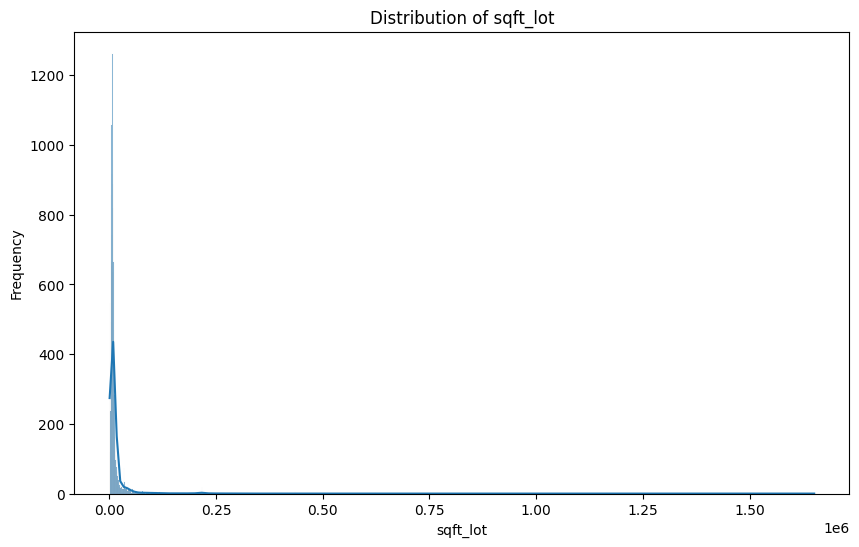

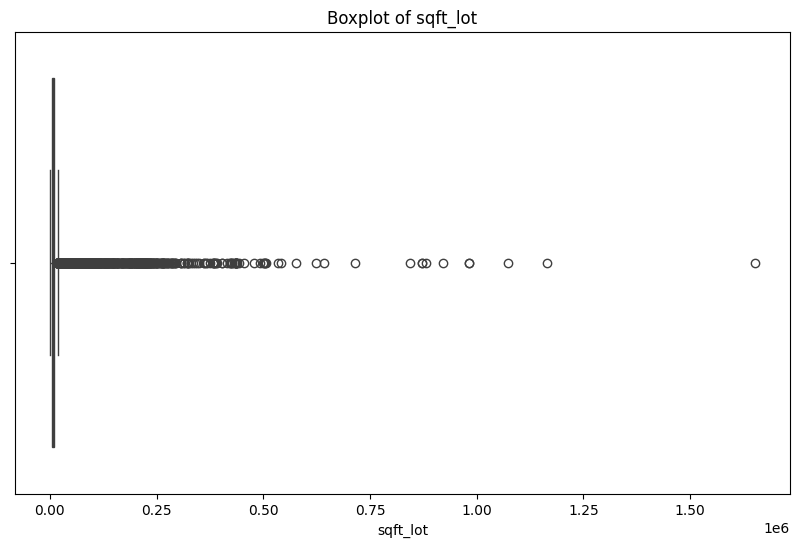

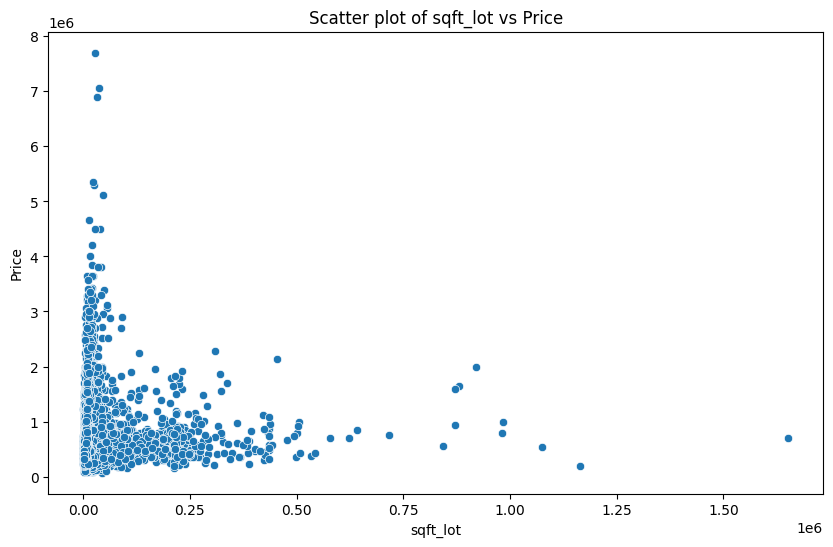

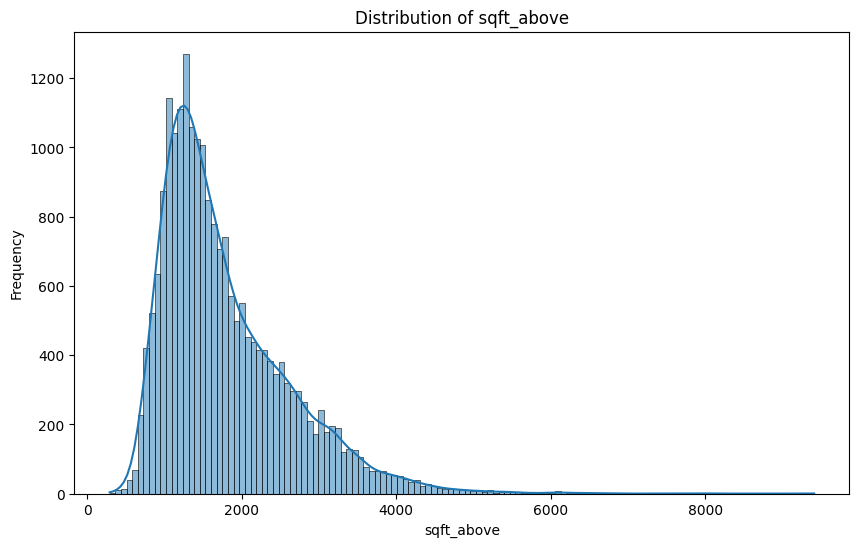

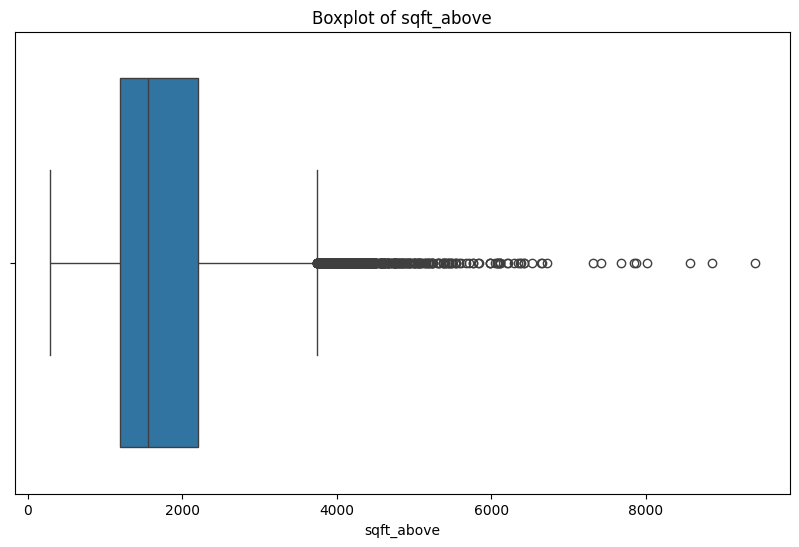

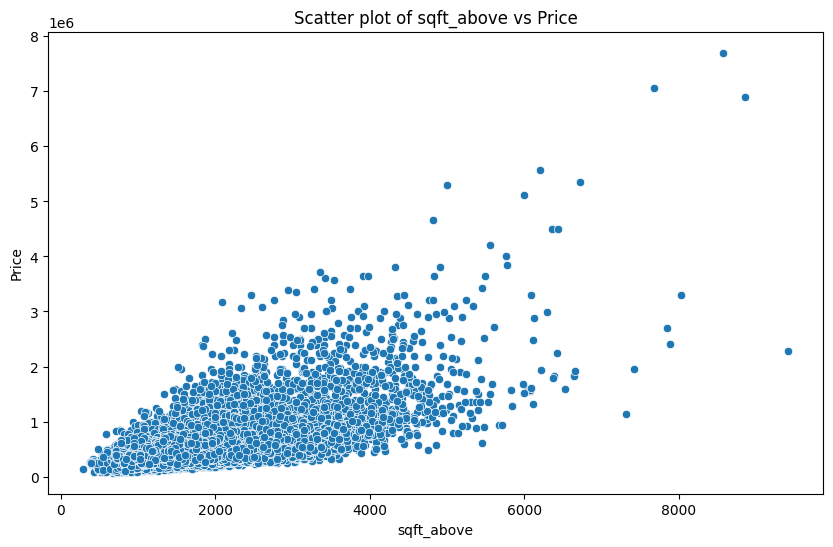

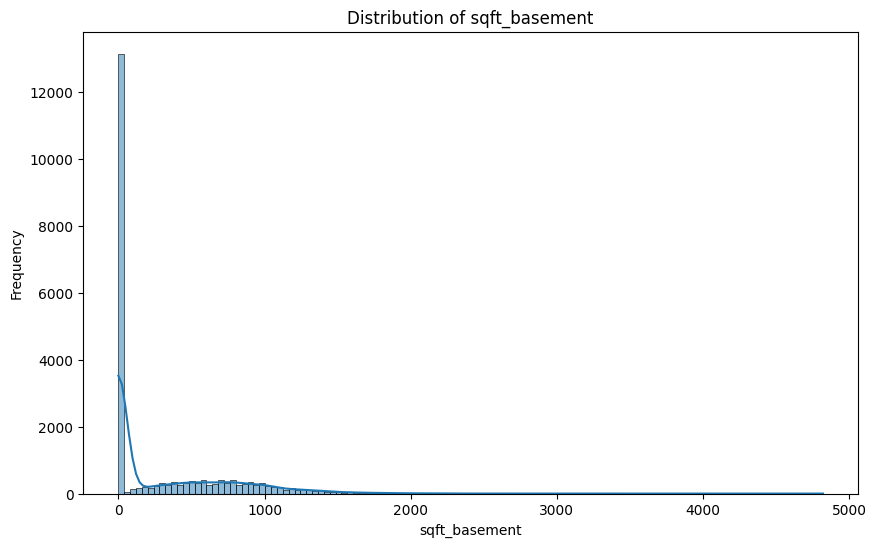

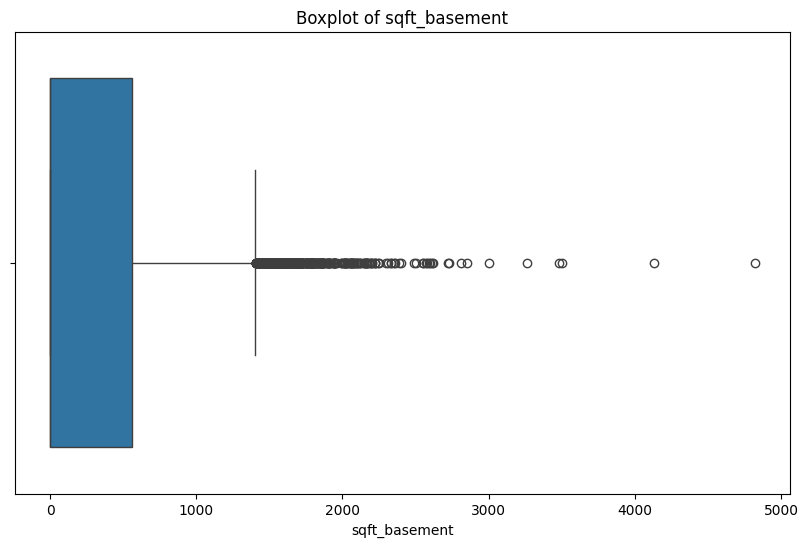

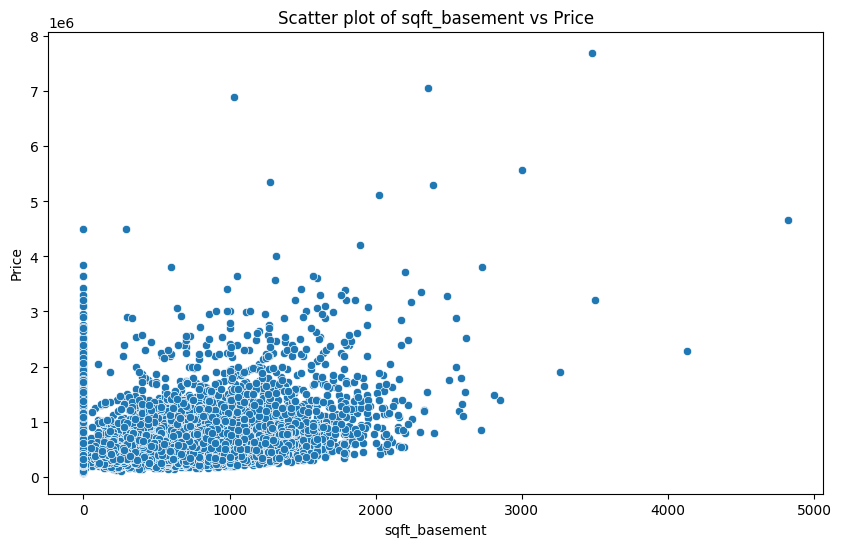

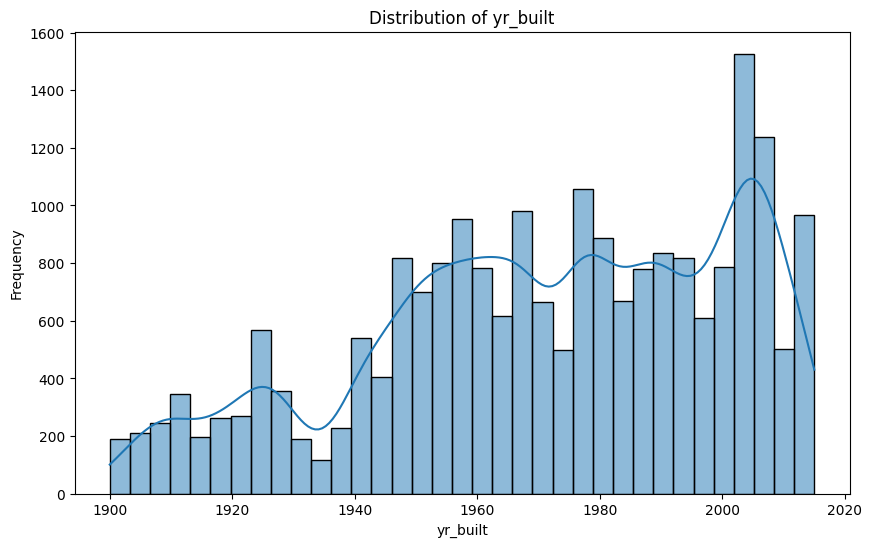

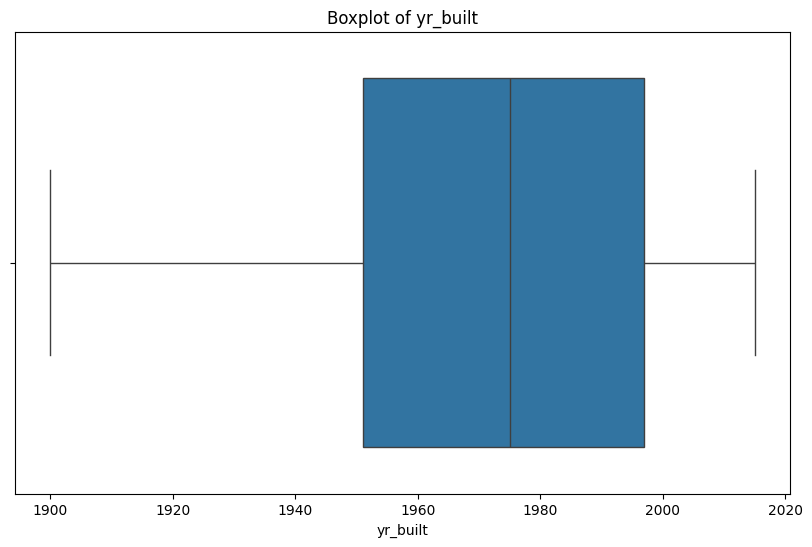

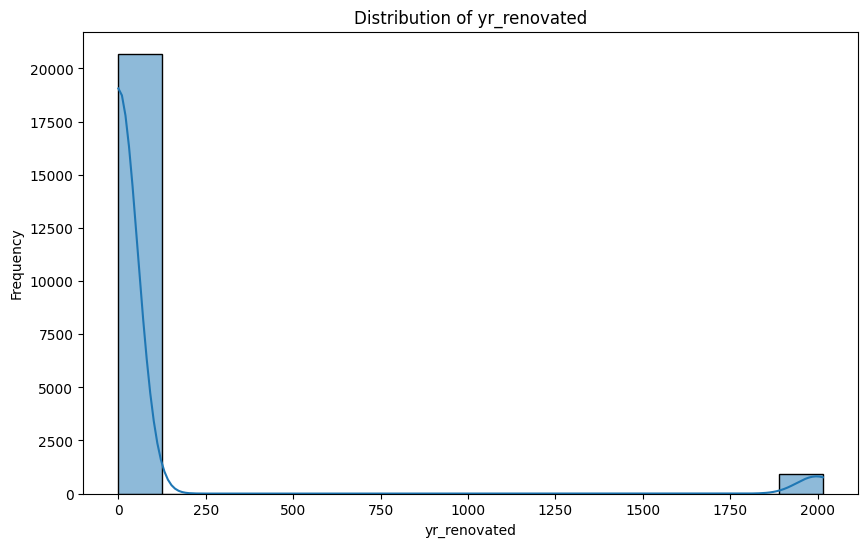

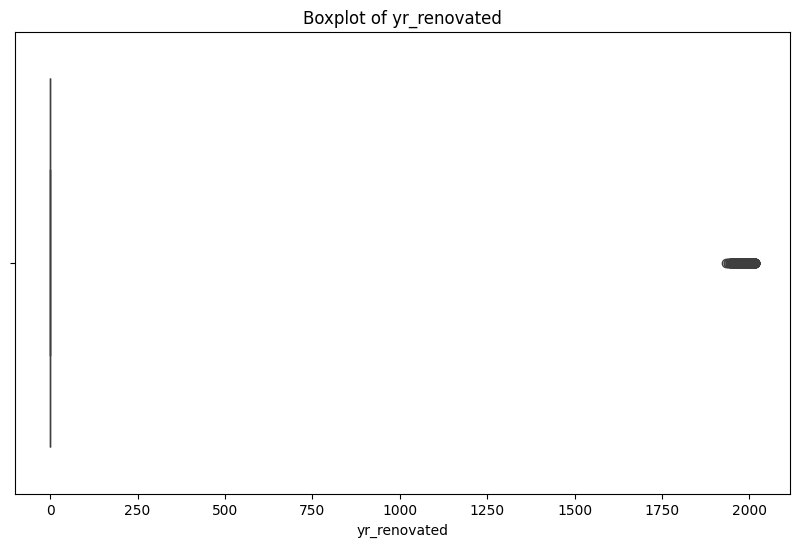

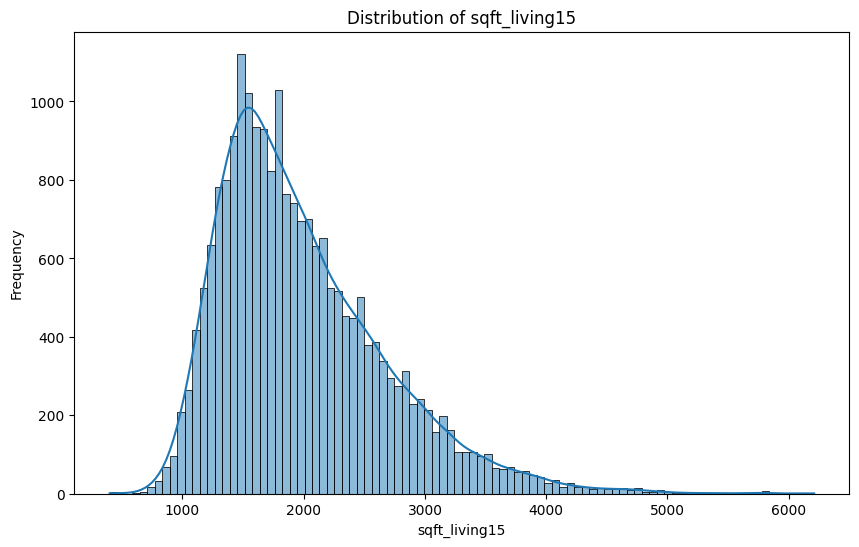

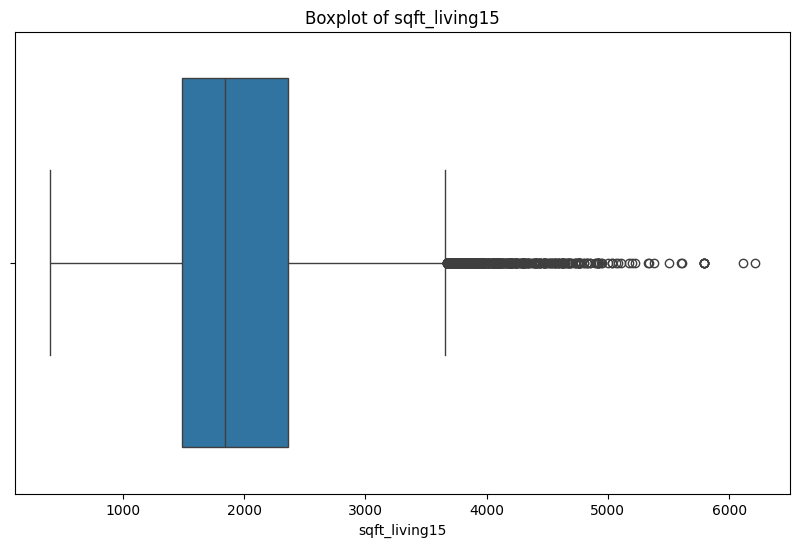

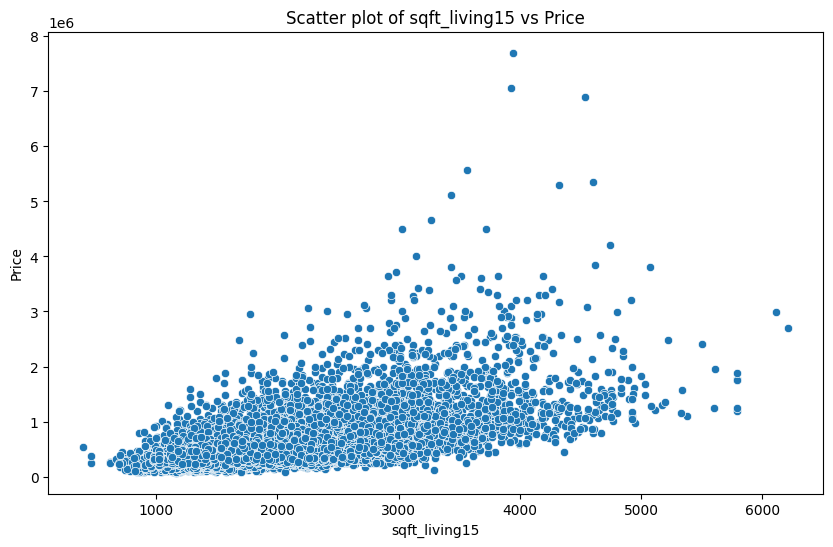

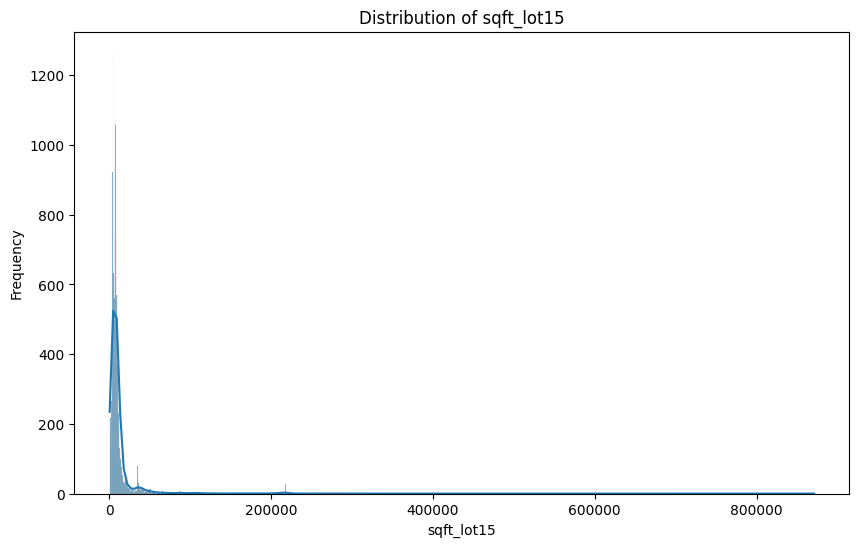

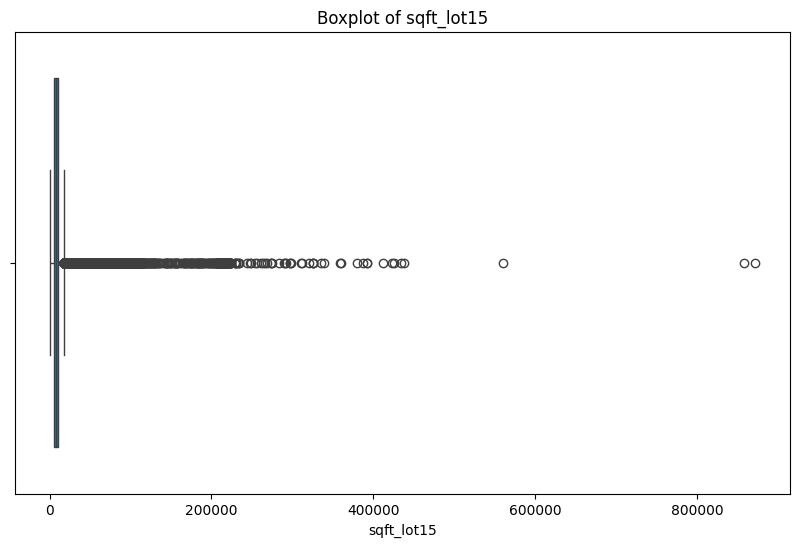

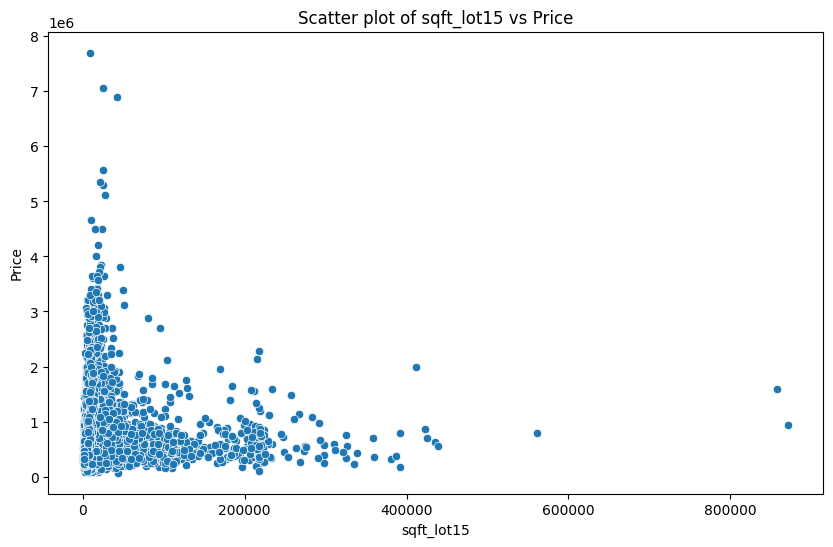

           bedrooms     bathrooms   sqft_living      sqft_lot    sqft_above  \
count  20479.000000  20545.000000  20503.000000  2.056900e+04  21613.000000   
mean       3.372821      2.113507   2081.073697  1.517982e+04   1788.390691   
std        0.930711      0.768913    915.043176  4.148617e+04    828.090978   
min        0.000000      0.000000    290.000000  5.200000e+02    290.000000   
25%        3.000000      1.500000   1430.000000  5.040000e+03   1190.000000   
50%        3.000000      2.250000   1920.000000  7.620000e+03   1560.000000   
75%        4.000000      2.500000   2550.000000  1.070800e+04   2210.000000   
max       33.000000      8.000000  12050.000000  1.651359e+06   9410.000000   

       sqft_basement      yr_built  yr_renovated  sqft_living15     sqft_lot15  
count   21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean      291.509045   1971.005136     84.402258    1986.552492   12768.455652  
std       442.575043     29.373411    401.679

In [ ]:
# Numerical variables
numerical_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
                  'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

# Providing measures of centrality and distribution
summary_stats = house_sales[numerical_vars].describe()

# Visualizations
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    plt.title(f'Distribution of {var}')
    sns.histplot(house_sales[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.title(f'Boxplot of {var}')
    sns.boxplot(x=house_sales[var])
    plt.xlabel(var)
    plt.show()

    if var != 'yr_built' and var != 'yr_renovated':  # Excluding year variables from scatter plot
        plt.figure(figsize=(10, 6))
        plt.title(f'Scatter plot of {var} vs Price')
        sns.scatterplot(x=house_sales[var], y=house_sales['price'])
        plt.xlabel(var)
        plt.ylabel('Price')
        plt.show()

print(summary_stats)

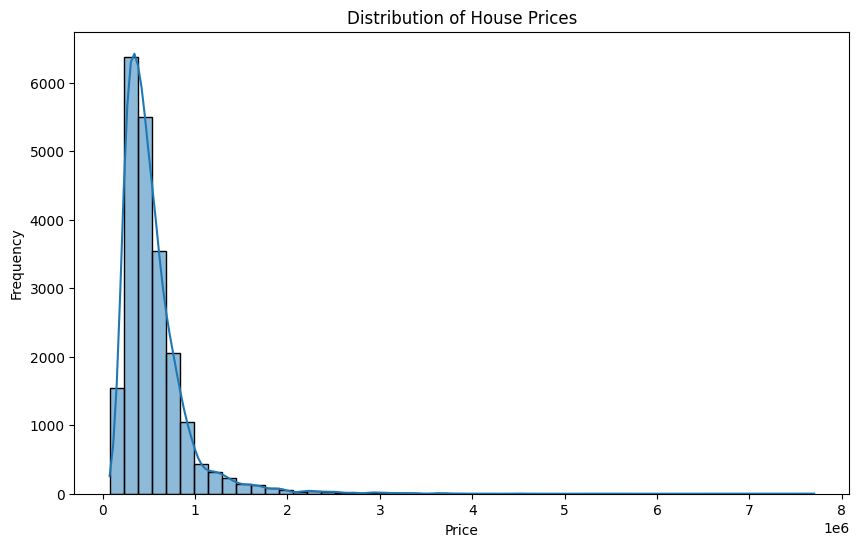

In [ ]:
# Let's plot a histogram of house prices to see the overall distribution
plt.figure(figsize=(10,6))
sns.histplot(data=house_sales, x='price', bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

For diagnose correlations between variables, we can calculate the correlation matrix and then analyze it to determine the strength and direction of relationships between variables.

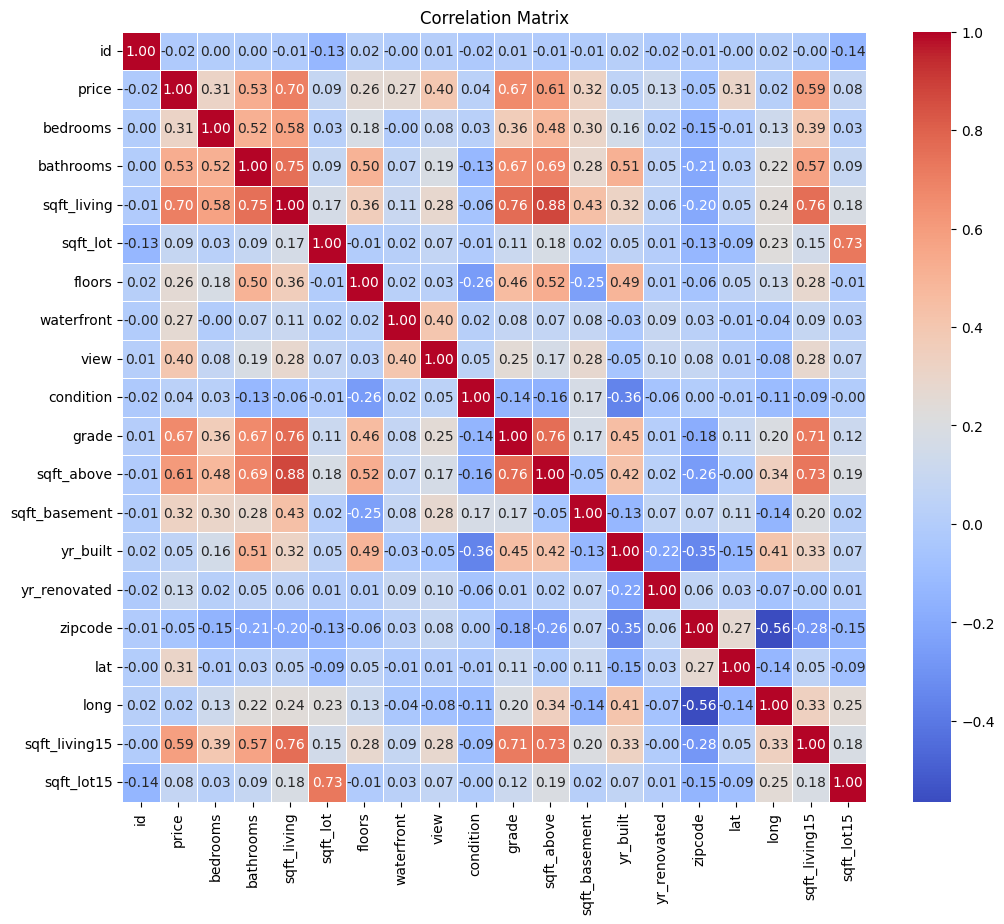

In [ ]:
# Calculate the correlation matrix
house_sales.drop(columns=['date'], inplace=True)
correlation_matrix = house_sales.corr()
# Let's show the correlation matrix to identify independent and dependent variables
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Example**

In [ ]:
#Let's assume that 'price' is dependent variable
dependent_variable = 'price'

# Calculating correlations of all variables with the dependent variable
correlations_with_price = correlation_matrix[dependent_variable].sort_values(ascending=False)

# Printing correlations with 'price'
print("Correlations with 'price'is")
print(correlations_with_price)

Correlations with 'price'is
price            1.000000
sqft_living      0.701579
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.526600
view             0.397293
sqft_basement    0.323816
bedrooms         0.310823
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.088422
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


Equation of the line: y = 280.86 * x + -43832.23


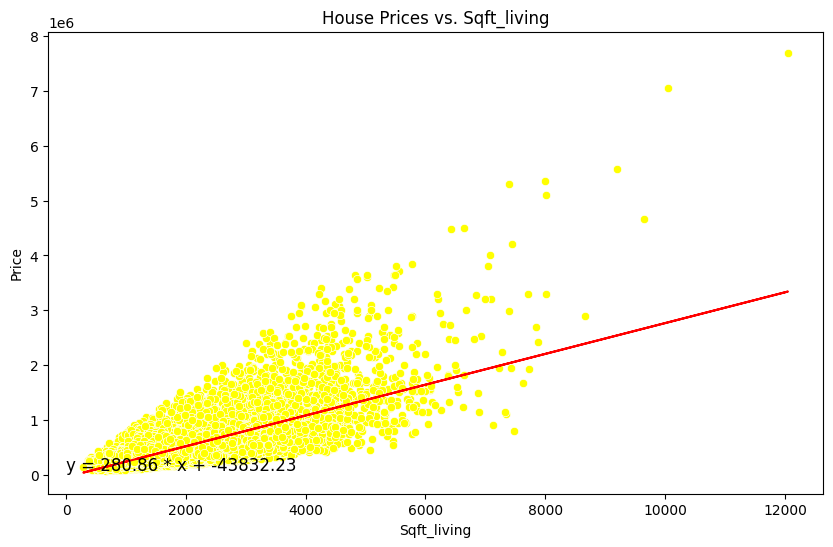

In [ ]:
# Dropping missing values from 'sqft_living' and 'price' columns for equation
house_sales_cleaned = house_sales.dropna(subset=['sqft_living', 'price'])

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=house_sales_cleaned, x='sqft_living', y='price', color='yellow')

# Fitting a linear regression model
x = house_sales_cleaned['sqft_living']
y = house_sales_cleaned['price']
slope, intercept, _, _, _ = linregress(x, y)

# Checking if slope and intercept are valid
if not np.isnan(slope) and not np.isnan(intercept):

    # Equation of the line
    line_eq = f'y = {slope:.2f} * x + {intercept:.2f}'
    print("Equation of the line:", line_eq)

    # Plotting the regression line
    plt.plot(x, slope * x + intercept, color='red')

    # Adding equation to the plot, and adjusting coordinates
    plt.text(5, 80000, line_eq, fontsize=12, color='black')
else:
    print("Unable to calculate linear regression due to missing or invalid data.")

# Customizing plot
plt.title('House Prices vs. Sqft_living')
plt.xlabel('Sqft_living')
plt.ylabel('Price')

# Displaying
plt.show()


Performing exploratory data analysis (EDA) in combination with visualization techniques is crucial for discovering patterns and features of interest in house_sales dataset. For EDA we need to understand the structure of the data, including the types of variables, missing values, and summary statistics. Do bivariate analysis, find relationships between variables, identify potential patterns and correlations. Next is multivariate analysis, visualizing relationships between multiple variables at once.


In [ ]:
# Understanding the structure of the data
print(house_sales.head())
print(house_sales.info())
print(house_sales.describe())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6414100192  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5631500400  20150225T000000  180000.0       2.0       1.00        770.0   
3  2487200875  20141209T000000  604000.0       4.0       3.00       1960.0   
4  1954400510  20150218T000000  510000.0       3.0       2.00       1680.0   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0    5650.0     1.0           0     0  ...      7        1180              0   
1    7242.0     2.0           0     0  ...      7        2170            400   
2   10000.0     1.0           0     0  ...      6         770              0   
3    5000.0     1.0           0     0  ...      7        1050            910   
4    8080.0     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

**Univariate Analysis**


*   Example


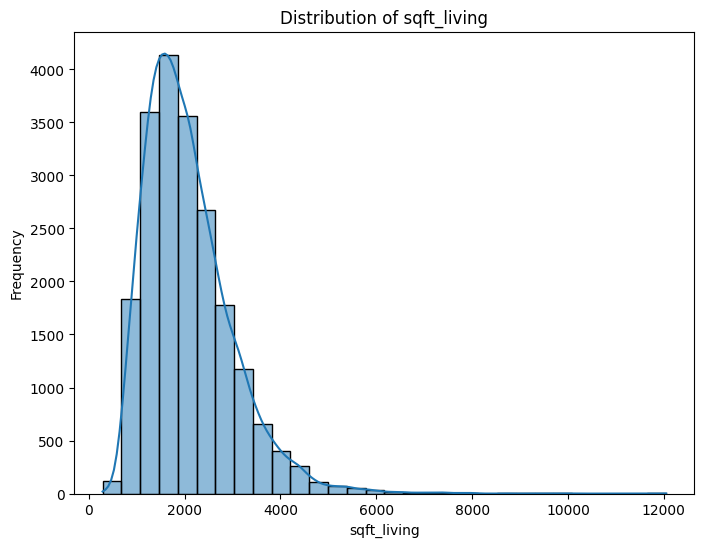

In [ ]:
# Histogram of 'sqft_living'
plt.figure(figsize=(8, 6))
sns.histplot(house_sales['sqft_living'], bins=30, kde=True)
plt.title('Distribution of sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('Frequency')
plt.show()

**Bivariate Analysis**


Bivariate and multivariate analysis with visualization techniques provided by seaborn and matplotlib.

Example


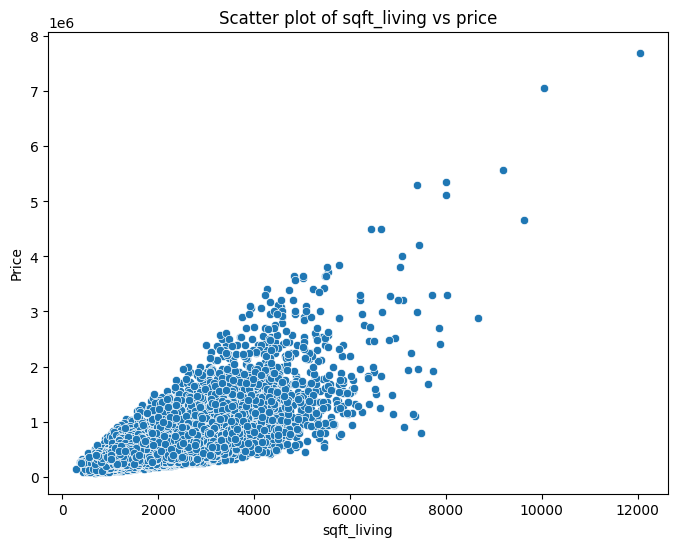

In [ ]:
# Scatterplot of 'sqft_living' vs 'price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=house_sales)
plt.title('Scatter plot of sqft_living vs price')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()

**Multivariate Analysis**


Example


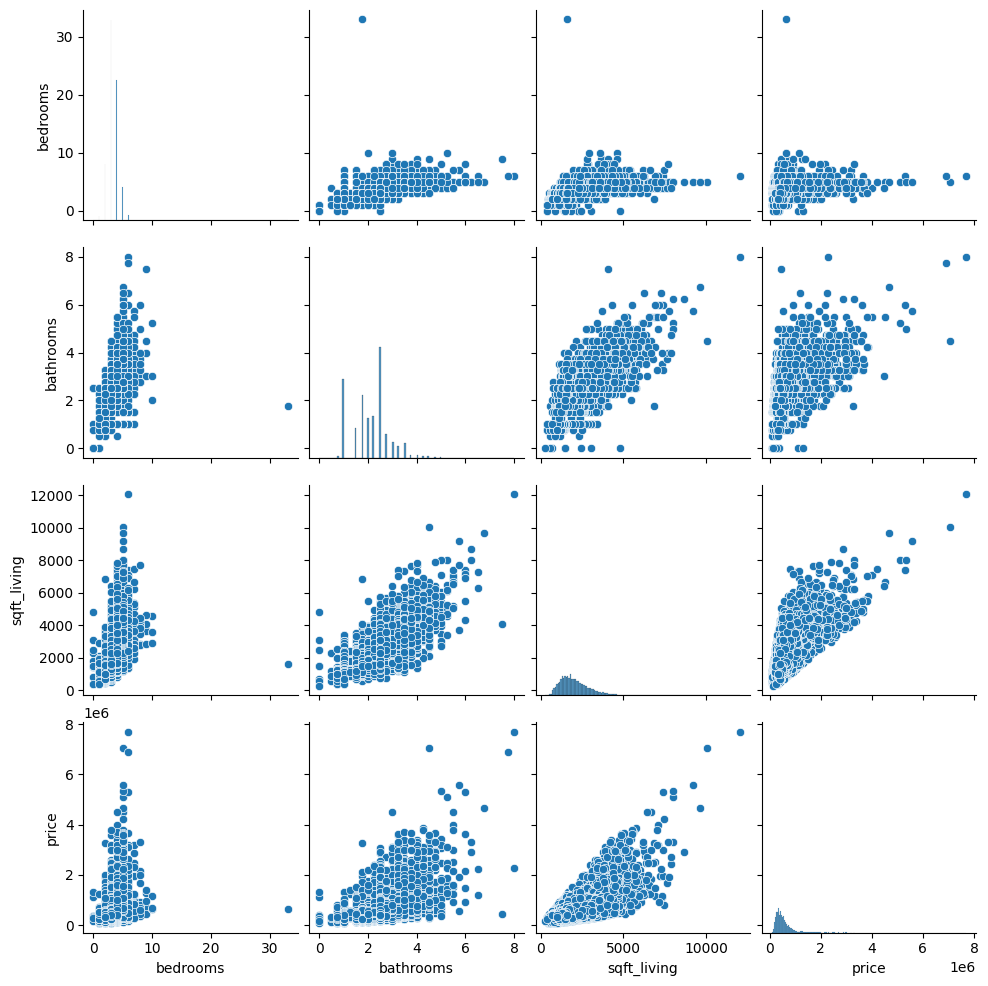

In [ ]:
# Pair plot of numerical variables
sns.pairplot(house_sales[['bedrooms', 'bathrooms', 'sqft_living', 'price']])
plt.show()

# **Topic #2 Data Analysis and Visualization Round 2**

# **Topic #3 Data Analytics**

**Task # 1 Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables**

**Task # 2 Train, test, and provide accuracy and evaluation metrics for model results**


**Unsupervised Learning Method**

key variables for understanding the distribution of house prices are the price column and the zipcode column, and the goal is to analyze the distribution of house prices within each area (zip code). In this case, the dependent variable would be the price column, and the independent variable would be the zipcode column.

In [ ]:


# identifying missing values
missing_values = house_sales.isna().sum()

#Imputing missing values with the mode (most frequent value) of the categorical columns
house_sales['waterfront'].fillna(house_sales['waterfront'].mode()[0], inplace=True)
house_sales['view'].fillna(house_sales['view'].mode()[0], inplace=True)
house_sales['condition'].fillna(house_sales['condition'].mode()[0], inplace=True)
house_sales['grade'].fillna(house_sales['grade'].mode()[0], inplace=True)

# Imputing missing values for numerical columns with mean
house_sales['bedrooms'].fillna(house_sales['bedrooms'].mean(), inplace=True)
house_sales['bathrooms'].fillna(house_sales['bathrooms'].mean(), inplace=True)
house_sales['sqft_living'].fillna(house_sales['sqft_living'].mean(), inplace=True)
house_sales['sqft_lot'].fillna(house_sales['sqft_lot'].mean(), inplace=True)

# Set pandas display options to show numbers in full format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Extract relevant features (price and zipcode)
X = house_sales[['price', 'zipcode']]

# Initialize the KMeans model with the number of clusters and n_init
n_clusters = 5  # example
n_init = 10  # explicitly to suppress the warning
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add cluster labels to the DataFrame
house_sales['Cluster'] = kmeans.labels_

# Group the data by cluster and zipcode and compute statistics
cluster_zipcode_stats = house_sales.groupby(['Cluster', 'zipcode'])['price'].describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
# Change the column header from 'mean' to 'mean price'
cluster_zipcode_stats.columns = ['count', 'mean price', 'std', 'min', '25%', '50%', '75%', 'max']
# Display the statistics with zip codes for each cluster
for cluster in range(n_clusters):
    print(f"Cluster {cluster}:")
    print(cluster_zipcode_stats.loc[cluster].head(10))
    print()

Cluster 0:
         count  mean price      std       min       25%       50%       75%  \
zipcode                                                                       
98001   323.00   254483.30 60758.52 100000.00 212250.00 250000.00 289975.00   
98002   199.00   234284.04 52041.45  95000.00 199975.00 235000.00 268500.00   
98003   252.00   266038.72 57468.24 128000.00 225000.00 258625.00 305000.00   
98005     2.00   405550.00  7848.89 400000.00 402775.00 405550.00 408325.00   
98006    25.00   347278.00 45933.18 247500.00 331500.00 365000.00 380000.00   
98007    10.00   370730.00 37041.66 295000.00 352500.00 382500.00 398825.00   
98008    27.00   361298.15 44664.80 250000.00 350000.00 370000.00 397500.00   
98010    57.00   278337.70 67543.56 135000.00 224400.00 263500.00 335000.00   
98011    49.00   359482.14 44717.14 245500.00 333500.00 370900.00 398000.00   
98014    61.00   285996.59 87893.88  80000.00 225000.00 307000.00 345000.00   

              max  
zipcode            


**Unsupervised Learning Method Data Analysis Findings:**

1.)Cluster 3 zip codes have the highest mean prices of all the clusters

2.)Cluster 0 zip codes has the lowerst mean prices of all the clusters

3.)**Highest Standard Deviation:** Cluster 3 has the highest standard deviation, with values ranging from approximately 253,000 to $1,033,000.

4.)**Lowest Standard Deviation:** Cluster 0 has the lowest standard deviation, with values ranging from approximately 52,000 to $88,000.

5.) The clustering results suggest spatial variability in housing prices across different zip codes. This indicates that location, as represented by zip code, plays a significant role in determining property values.

6.) There are significant disparities in housing prices between different zip codes. Some zip codes have much higher mean prices compared to others, indicating disparities in neighborhood desirability, amenities, and socioeconomic factors.

**Determining whether the zipcode variable has a statistically significant effect on the price variable.**

In [ ]:


# Group the data by zipcode and calculate the mean price for each group
zipcode_groups = house_sales.groupby('zipcode')['price'].apply(list)

# Perform ANOVA
f_statistic, p_value = f_oneway(*zipcode_groups)

print(f"ANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA p-value: {p_value:.2f}")

ANOVA F-statistic: 214.63
ANOVA p-value: 0.00


** Are statisics indicate that there are significant differences in mean prices across different zipcodes.**ANOVA results suggest that there is a statistically significant relationship between the dependent variable (price) and the independent variable (zip code). We can come to this conclusion, because of the significant differences in housing prices across different zip codes.

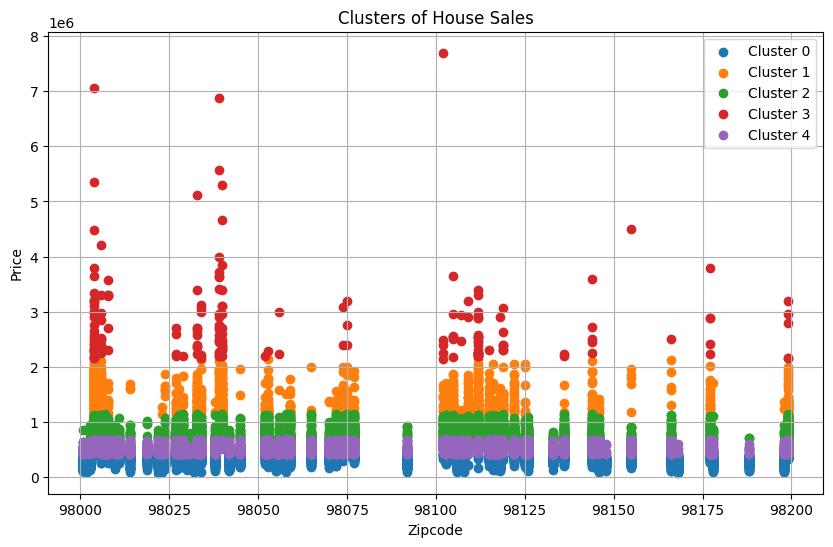

In [ ]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
n_clusters = 5
for cluster in range(n_clusters):
    cluster_data = house_sales[house_sales['Cluster'] == cluster]
    plt.scatter(cluster_data['zipcode'], cluster_data['price'], label=f'Cluster {cluster}')

plt.title('Clusters of House Sales')
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# **Topic #3 Data Analytics Round 2**

**Determining whether the zipcode variable has a statistically significant effect on the price variable.**

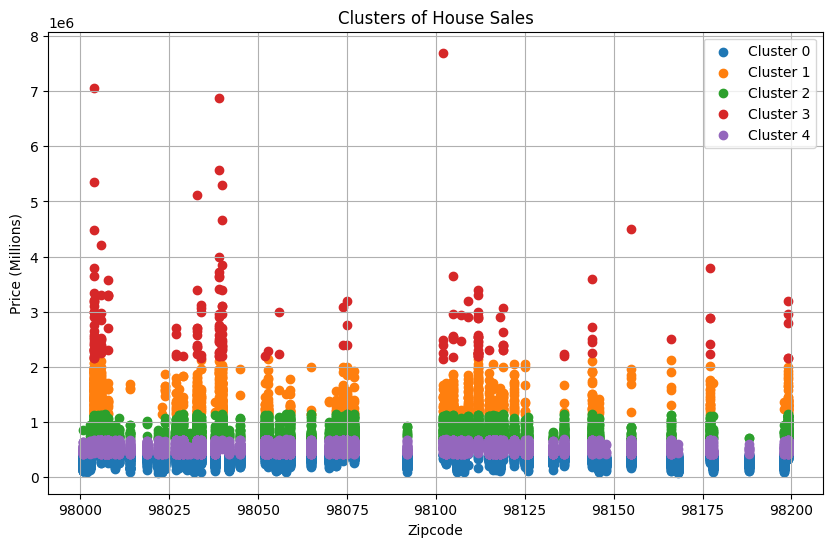

In [ ]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
n_clusters = 5
for cluster in range(n_clusters):
    cluster_data = house_sales[house_sales['Cluster'] == cluster]
    plt.scatter(cluster_data['zipcode'], cluster_data['price'], label=f'Cluster {cluster}')

plt.title('Clusters of House Sales')
plt.xlabel('Zipcode')
plt.ylabel('Price (Millions)')  # Adjusted label for the y-axis
plt.legend()
plt.grid(True)
plt.show()